# Decision Tree classisfication

1. Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
from sklearn import tree

In [2]:
df = sns.load_dataset('titanic')

In [3]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
Y = df['survived']

In [4]:
X = pd.get_dummies(X, columns=['sex'])

In [5]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
X.age.fillna(value=X['age'].mean(), inplace=True)

In [7]:
X_train, X_test, y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
print('Accuracy:', accuracy_score(Y_test,y_pred))

Accuracy: 0.770949720670391


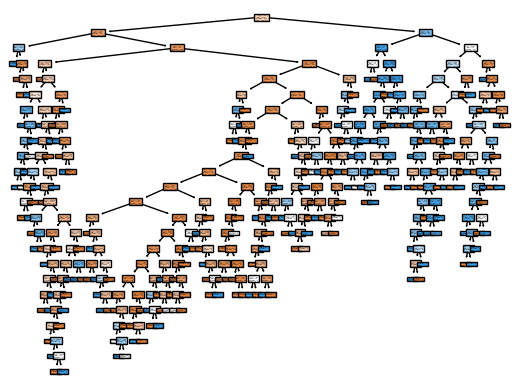

<Figure size 640x480 with 0 Axes>

In [11]:
tree.plot_tree(model.fit(X,Y), filled=True)
plt.show()
plt.savefig("tree.png")

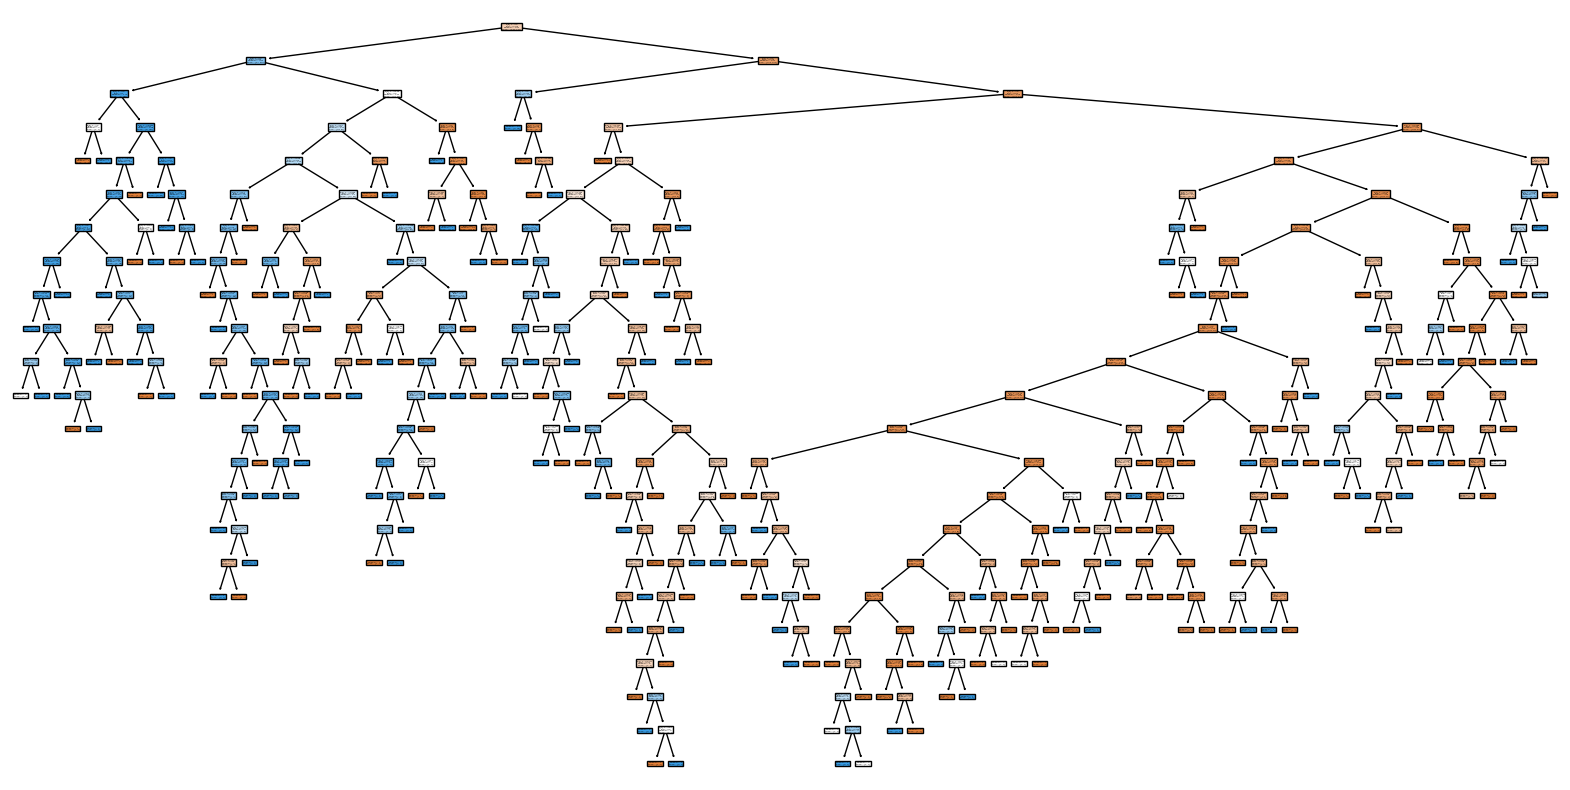

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,Y), filled=True)
plt.show()
plt.savefig("decision_tree.pdf", format='pdf', dpi=300)

In [13]:
# Precision
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(Y_test, y_pred)

0.7096774193548387

In [14]:
recall_score(Y_test, y_pred)

0.6567164179104478

In [15]:
f1_score(Y_test, y_pred)

0.682170542635659

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [23]:
precision_score(Y_test, y_pred)

0.7096774193548387

<AxesSubplot: >

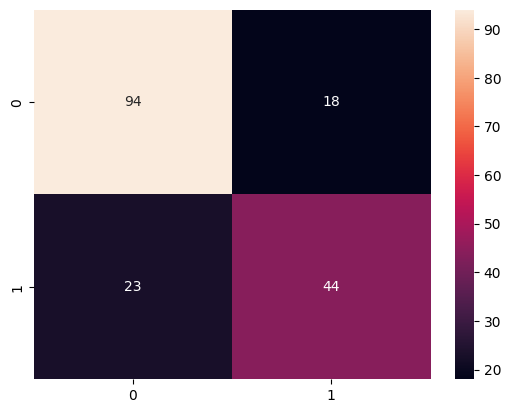

In [17]:
sns.heatmap(cm, annot=True)

# K Nearest Neighbour (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
cm



array([[90, 22],
       [30, 37]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

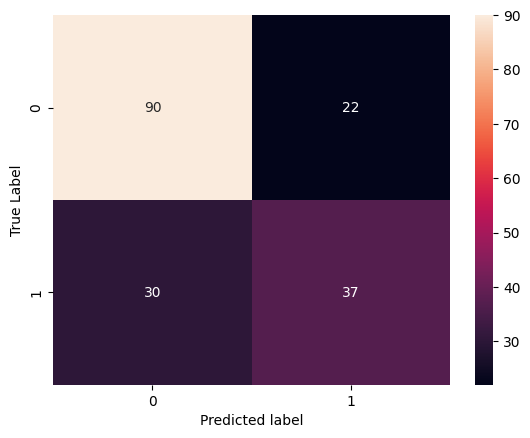

In [21]:
sns.heatmap(cm, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted label')

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print('confusion Matrix',cm)
print('precision score:', precision_score(Y_test,Y_pred))
print('Recall score:', recall_score(Y_test,Y_pred))
print('F1 score:', f1_score(Y_test,Y_pred))

confusion Matrix [[103   9]
 [ 25  42]]
precision score: 0.8235294117647058
Recall score: 0.6268656716417911
F1 score: 0.7118644067796609


## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print('confusion Matrix',cm)
print('precision score:', precision_score(Y_test,Y_pred))
print('Recall score:', recall_score(Y_test,Y_pred))
print('F1 score:', f1_score(Y_test,Y_pred))

confusion Matrix [[100  12]
 [ 19  48]]
precision score: 0.8
Recall score: 0.7164179104477612
F1 score: 0.7559055118110236


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [28]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print('confusion Matrix',cm)
print('precision score:', precision_score(Y_test,Y_pred))
print('Recall score:', recall_score(Y_test,Y_pred))
print('F1 score:', f1_score(Y_test,Y_pred))

confusion Matrix [[105   7]
 [ 52  15]]
precision score: 0.6818181818181818
Recall score: 0.22388059701492538
F1 score: 0.3370786516853933


## NAIVE Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)
print('confusion Matrix',cm)
print('precision score:', precision_score(Y_test,Y_pred))
print('Recall score:', recall_score(Y_test,Y_pred))
print('F1 score:', f1_score(Y_test,Y_pred))

confusion Matrix [[101  11]
 [ 18  49]]
precision score: 0.8166666666666667
Recall score: 0.7313432835820896
F1 score: 0.7716535433070867


In [30]:
# libraries and models
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define the models to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ['Logistic Regression', "KNN", "Random Forest", "SVM"]

# perform k-fold cross-validation for each model
k=10
for name, model in zip(names, models):
    cv_scores = cross_val_score(model, X_train, y_train, cv=k)
    print(f'{name} CV accuracy:{np.mean(cv_scores):.3f}+/-{np.std(cv_scores):.3f}')


c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression CV accuracy:0.793+/-0.034
KNN CV accuracy:0.687+/-0.044
Random Forest CV accuracy:0.802+/-0.043
SVM CV accuracy:0.673+/-0.029
